In [21]:
import re
import math
import pandas as pd
import bokeh
from bokeh.plotting import figure, output_notebook, show

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## The goal of this ipython notebook is to learn how to do basic data analysis and how to make the data analysis and cleaning of data more efficent

In [4]:
summary = pd.read_csv("atusdata/atussum_2013.dat")

In [5]:
def average_minutes(data, activity_col):
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data = data[['weight', "minutes"]]
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [6]:
def stdev_minutes(data, activity_col):
    data_mean = average_minutes(data, activity_col)
    num_non0_obs = summary[summary.TUFINLWGT != 0].TUFINLWGT.count()
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data = data[["weight", "minutes"]]
    data['weighted_ss'] = data.weight * (data.minutes - data_mean)**2
    return math.sqrt(data.weighted_ss.sum()/(((num_non0_obs-1)/num_non0_obs)*data.weight.sum()))

In [7]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [8]:
def hypothesis_test_plot(data, group_var, test_var):
    data = data[[group_var, test_var, "TUFINLWGT"]]
    data_grouped = data.groupby(group_var)
    frame = pd.DataFrame()
    for group in data_grouped:
        count = group[1].TUFINLWGT.count()
        mean = average_minutes(group[1], test_var)
        stdev = stdev_minutes(group[1], test_var)
        frame = frame.append({group_var: group[0], "mean": mean, "error": (stdev*1.96/math.sqrt(count))}, ignore_index=True)
    frame.index = frame.pop(group_var)
    plot = frame.plot(kind="bar", yerr="error", figsize=(12, 8))
    return (frame, plot)
    

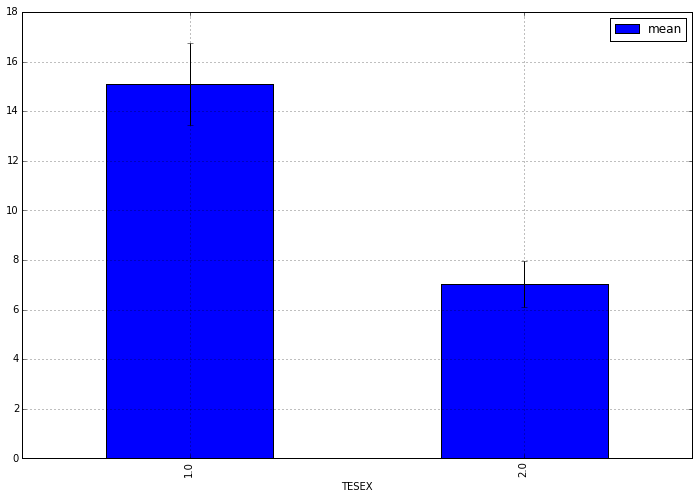

In [10]:
hypothesis_test_plot(summary, "TESEX", "t020501")[1]

In [11]:
import re
with open("Bekk'sRoom/dictionary.py") as dictionary:
    string = dictionary.read()
string = re.sub(r'[\n \{\}]', "", string[5:-3])
string = re.sub(r"','", "\n", string)
string = re.sub(r"':'", ",", string)
with open("Bekk'sRoom/dictionary.csv", 'w') as dictionary:
    dictionary.write(string)

FileNotFoundError: [Errno 2] No such file or directory: "Bekk'sRoom/dictionary.py"

In [9]:
from BekksRoom.messy import datasets
from BekksRoom.dictionary import key
import seaborn as sns
test = summary.rename(columns=key)

###Please test the following function which is able to clean, provide basic analyzation and provide basic graphing.  The goal of this function is to allow quick analyzation of large amounts of data. 

In [1]:
newdata = datasets(test)

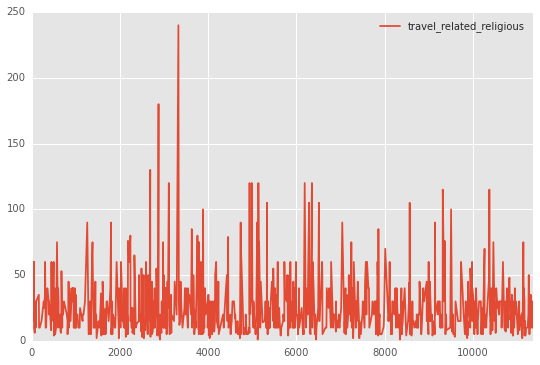

In [52]:
newdata.plot()

In [2]:
tvlegal = datasets(test)

In [3]:
thinkingtravelrelatedvolunteering = datasets(test)


In [ ]:
tlmccomputeruse = datasets(test)

In [5]:
kids = test.Age < 18
youth = datasets(test, kids)

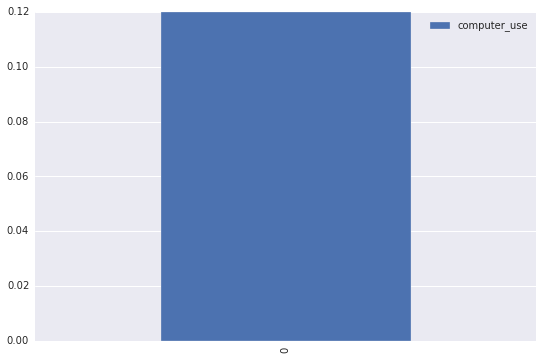

In [38]:
youth.plot(kind='bar')

In [6]:
adult = test.Age > 18
adults = datasets(test, adult)

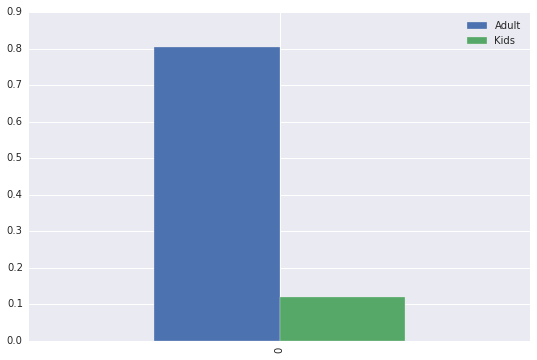

In [40]:
compare = pd.DataFrame.merge(adults, youth, left_index=True, right_index=True)
compare = compare.rename(columns = {"computer_use_x":"Adult", "computer_use_y":"Kids"})
compare
compare.plot(kind="bar")

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n n
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
Are you going to use groupby? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interi

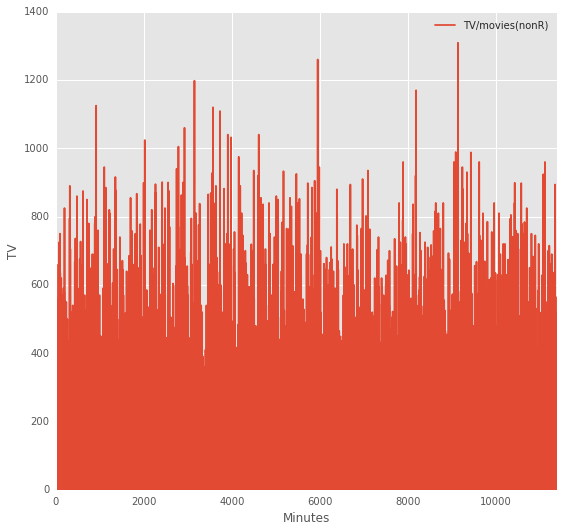

In [41]:
tv = datasets(test)

###Here I am experimenting with different types of graph seeing how they represent the data and what can be learned from their representation

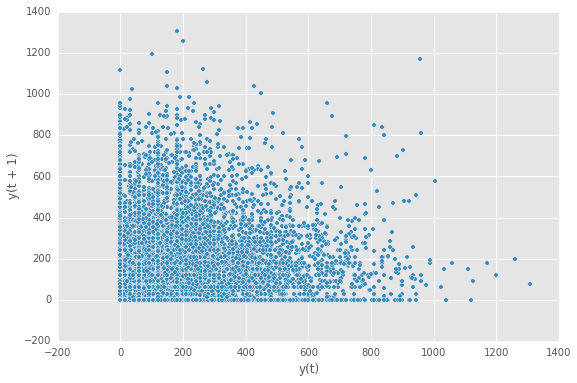

In [48]:
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
a,b = tv
#a.plot()
lag_plot(a)

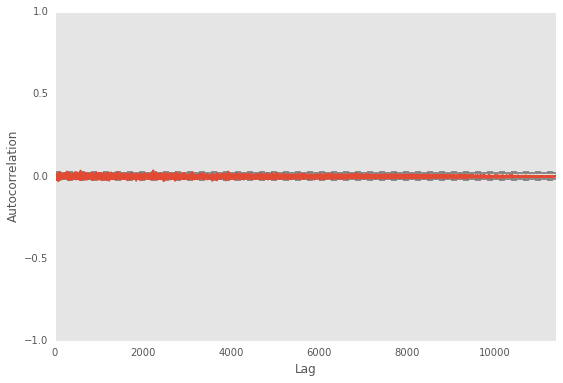

In [50]:
autocorrelation_plot(a)

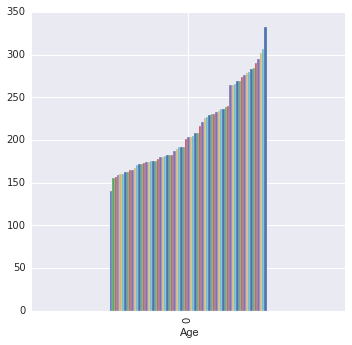

In [28]:
#agetv = datasets(test)
#grouped = agetv.groupby('Age')
group_list = []
for item, group in agetv:
    # print(item)
    group_list.append(average_minutes(group, "TV/movies(nonR)"))
count = 0
newdataframe = {}
group_list = sorted(group_list)
for item,group in agetv:
        newdataframe[item] = [int(group_list[count])]
        count += 1
data = pd.DataFrame.from_dict(newdataframe, orient='columns', dtype=None)
ax = data.plot(kind="bar", figsize=(5,5), legend=False)
ax.set_xlabel('Age')


want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n y
Want standard Deviation? y/n n
Want hypothesis testing? y/n y
Automatically including weight because you want hypothesis test
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furn

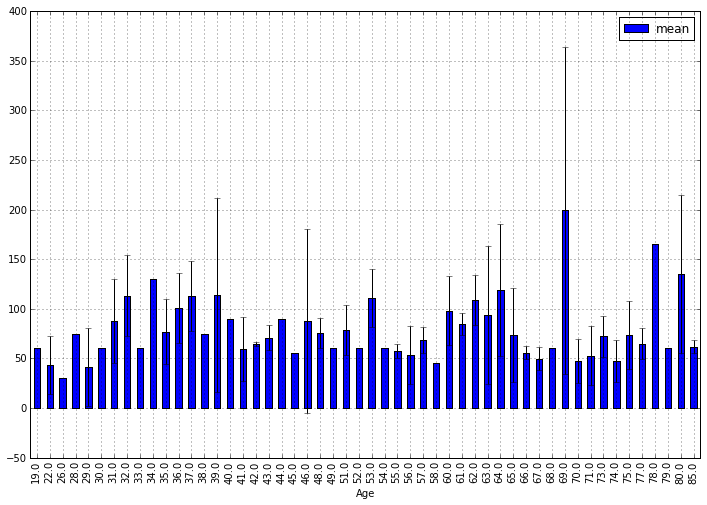

In [16]:
youth = test.Age > 18
soren = datasets(test, youth)


In [16]:
d = datasets(test)

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n y
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
Are you going to use groupby? y/n y
Automatically including weight because you want to use groupby 
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,

In [17]:
print(d)

In [22]:
bar_chart_test = datasets(test)

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

['bmh', 'dark_background', 'fivethirtyeight', 'grayscale', 'ggplot']
   TV/movies(nonR)  tobacco/drug_use
0       165.971192          0.300192


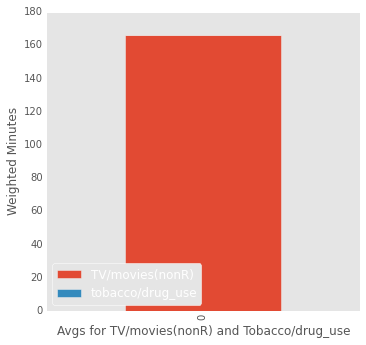

In [54]:
print(plt.style.available)
plt.style.use('ggplot')
print(bar_chart_test)
ax = bar_chart_test.plot(kind="bar", figsize=(5,5), legend=True, stacked=False)
ax.set_ylabel("Weighted Minutes")
ax.grid(False, 'both')
ax.set_xlabel("Avgs for TV/movies(nonR) and Tobacco/drug_use")

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

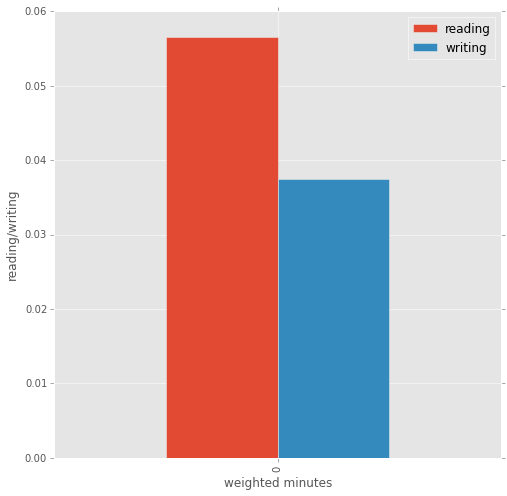

In [12]:
bar_chart_test = datasets(test)

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n n
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
Are you going to use groupby? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interi

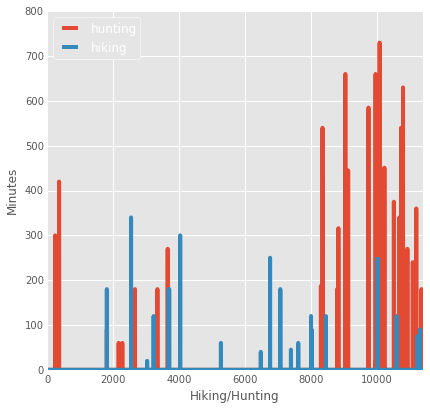

In [20]:
line_chart_test = datasets(test)

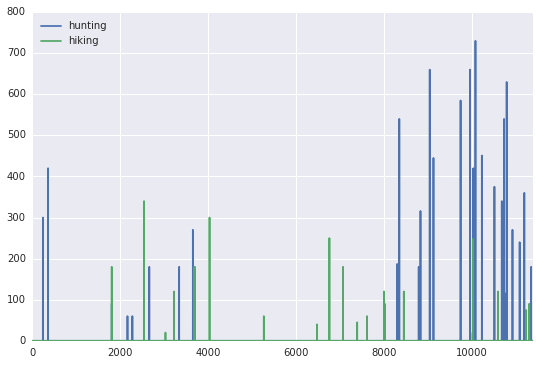

In [25]:
a, b = line_chart_test
a.plot()

In [12]:
bokeh_testing = datasets(test)

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

In [27]:
Bar(bokeh_testing, notebook=True).show()


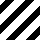
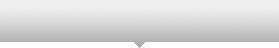
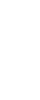
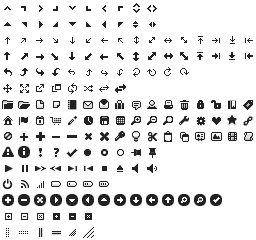
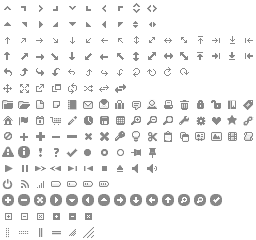
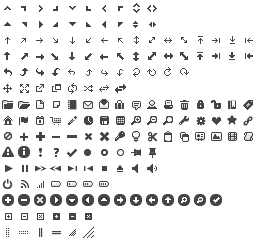
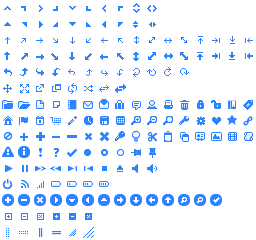
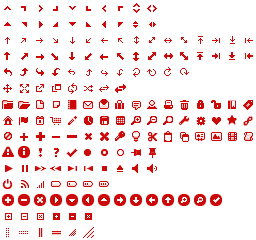
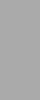
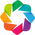
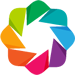
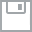
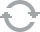
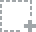
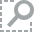
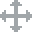
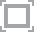
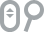

In [23]:
output_notebook()

In [29]:
plt.figure()
parallel_coordinates(test, colormap='gist_rainbow')

NameError: name 'parallel_coordinates' is not defined

want the average? y/n n
Want your data cleaned?  We drop zeros and nan. y/n y
Want standard Deviation? y/n n
Want hypothesis testing? y/n n
Are you going to use groupby? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interi

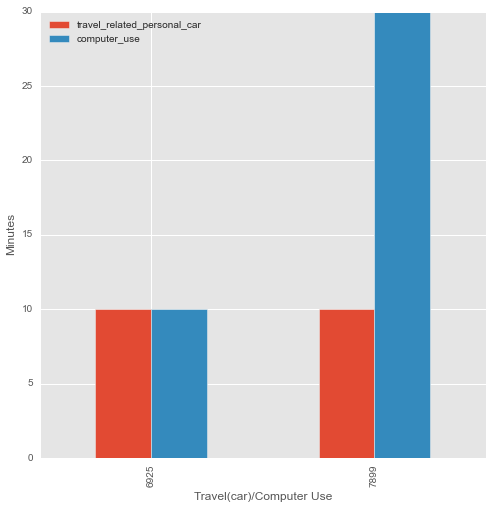

In [30]:
test9 = datasets(test)

In [31]:
a, b = test9

In [32]:
print(a)

      travel_related_personal_car  computer_use
6925                           10            10
7899                           10            30


In [33]:
print(b)

Axes(0.125,0.125;0.775x0.775)
